<a href="https://colab.research.google.com/github/ahsantahseen/Food-Dish-Detection/blob/main/PakistaniDishDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
 mkdir ./dataset

In [ ]:
!cp -r /content/drive/MyDrive/pakistani-dish-dataset/ ./dataset/pakistani-dish-dataset

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd

In [ ]:
train_dir = "/content/dataset/pakistani-dish-dataset/dataset/training"
val_dir   = "/content/dataset/pakistani-dish-dataset/dataset/validation"
test_dir  = "/content/dataset/pakistani-dish-dataset/dataset/evaluation"

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

target_size = (224,224)
batch_size = 16

# Data Generator
train_datagen = ImageDataGenerator(
    rescale=1./255,
#    rotation_range=40,
#    width_shift_range=0.2,
#    height_shift_range=0.2,
#    shear_range=0.2,
#    zoom_range=0.2,
#    horizontal_flip=True,
#    vertical_flip=True
)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=target_size,
    batch_size=batch_size,
    color_mode='rgb',    
    shuffle=True,
    seed=42,
    class_mode='categorical')


Found 360 images belonging to 6 classes.


In [ ]:
valid_datagen = ImageDataGenerator(rescale=1./255)

valid_generator = valid_datagen.flow_from_directory(
    val_dir,
    target_size=target_size,
    batch_size=batch_size,
    color_mode='rgb',
    shuffle=False,    
    class_mode='categorical')

Found 366 images belonging to 6 classes.


In [ ]:
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=target_size,
    batch_size=batch_size,
    color_mode='rgb',
    shuffle=False,    
    class_mode='categorical')

Found 367 images belonging to 6 classes.


In [ ]:
labels = list(test_generator.class_indices.keys())
print(labels)

['biryani', 'gulab_jamun', 'karahi', 'samosa', 'shami_kabab', 'tikka']


In [ ]:
import tensorflow.keras as keras
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense

In [ ]:
pip install -q efficientnet

     |████████████████████████████████| 50 kB 3.0 MB/s 


In [ ]:
import efficientnet.tfkeras as efn
base_model = efn.EfficientNetB7(input_shape=(224,224,3), weights='imagenet', include_top=False)

258449408/258434480 [==============================] - 3s 0us/step


In [ ]:
num_classes = len(labels) # food-11

In [ ]:
# Add Extra Layers to Model
x=base_model.output
x=GlobalAveragePooling2D()(x)
x=Dense(512,activation='relu')(x) 
x=Dense(64,activation='relu')(x) 
out=Dense(num_classes,activation='softmax')(x) #final layer with softmax activation

model=Model(inputs=base_model.input,outputs=out)

In [ ]:
# For Transfer Learning
base_model.trainable = False

In [ ]:
model.input

<KerasTensor: shape=(None, 224, 224, 3) dtype=float32 (created by layer 'input_1')>

In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 stem_conv (Conv2D)             (None, 112, 112, 64  1728        ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 stem_bn (BatchNormalization)   (None, 112, 112, 64  256         ['stem_conv[0][0]']              
                                )                                                             

In [ ]:
# Compile Model
model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])

In [ ]:
num_epochs = 5
STEP_SIZE_TRAIN=train_generator.n//train_generator.batch_size
STEP_SIZE_VALID=valid_generator.n//valid_generator.batch_size
STEP_SIZE_TEST =test_generator.n//test_generator.batch_size

In [ ]:
history = model.fit(train_generator, steps_per_epoch=STEP_SIZE_TRAIN, epochs=num_epochs, 
          validation_data=valid_generator, validation_steps=STEP_SIZE_VALID)

Epoch 1/5
22/22 [==============================] - 42s 619ms/step - loss: 1.1303 - accuracy: 0.5959 - val_loss: 0.4033 - val_accuracy: 0.8665
Epoch 2/5
22/22 [==============================] - 9s 391ms/step - loss: 0.4182 - accuracy: 0.8576 - val_loss: 0.3014 - val_accuracy: 0.8977
Epoch 3/5
22/22 [==============================] - 9s 392ms/step - loss: 0.2819 - accuracy: 0.8866 - val_loss: 0.2881 - val_accuracy: 0.9006
Epoch 4/5
22/22 [==============================] - 9s 396ms/step - loss: 0.1934 - accuracy: 0.9215 - val_loss: 0.2071 - val_accuracy: 0.9403
Epoch 5/5
22/22 [==============================] - 9s 397ms/step - loss: 0.2128 - accuracy: 0.9360 - val_loss: 0.2459 - val_accuracy: 0.9318


In [ ]:
# Evaluate Model
loss, acc = model.evaluate(test_generator, steps=STEP_SIZE_TEST)
print("The accuracy of the model is {:.3f}\nThe Loss in the model is {:.3f}".format(acc,loss))

22/22 [==============================] - 4s 191ms/step - loss: 0.1848 - accuracy: 0.9545
The accuracy of the model is 0.955
The Loss in the model is 0.185


In [ ]:
model.save("./PakistaniFoodDishDetection-5-19-2022");

INFO:tensorflow:Assets written to: ./PakistaniFoodDishDetection-5-19-2022/assets


In [ ]:
!zip -r PakistaniFoodDishDetectionModel ./PakistaniFoodDishDetection-5-19-2022

  adding: PakistaniFoodDishDetection-5-19-2022/ (stored 0%)
  adding: PakistaniFoodDishDetection-5-19-2022/assets/ (stored 0%)
  adding: PakistaniFoodDishDetection-5-19-2022/keras_metadata.pb (deflated 96%)
  adding: PakistaniFoodDishDetection-5-19-2022/saved_model.pb (deflated 92%)
  adding: PakistaniFoodDishDetection-5-19-2022/variables/ (stored 0%)
  adding: PakistaniFoodDishDetection-5-19-2022/variables/variables.index (deflated 79%)
  adding: PakistaniFoodDishDetection-5-19-2022/variables/variables.data-00000-of-00001 (deflated 8%)


In [ ]:
# load and show an image with Pillow
from PIL import Image
import numpy as np
# Open the image form working directory



In [ ]:
%matplotlib inline

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

biryani


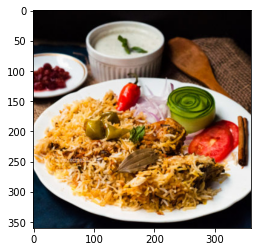

In [ ]:
imageName = '/biryani/207.jpg'
imgdata = np.expand_dims(np.asarray(Image.open(f'/content/dataset/pakistani-dish-dataset/dataset/evaluation{imageName}').resize([224,224])),0)/255
img = mpimg.imread(f'/content/dataset/pakistani-dish-dataset/dataset/evaluation{imageName}')
plt.imshow(img)
print(labels[np.argmax(model.predict(imgdata))])

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip /content/drive/MyDrive/PakistaniFoodDishDetectionModel.zip -d ./

Archive:  /content/drive/MyDrive/PakistaniFoodDishDetectionModel.zip
   creating: ./PakistaniFoodDishDetectionModel/
   creating: ./PakistaniFoodDishDetectionModel/.ipynb_checkpoints/
  inflating: ./PakistaniFoodDishDetectionModel/.ipynb_checkpoints/PakistaniDishDetectionTestingAndVisualization-checkpoint.ipynb  
  inflating: ./PakistaniFoodDishDetectionModel/biryani.jpeg  
  inflating: ./PakistaniFoodDishDetectionModel/biryani.jpg  
  inflating: ./PakistaniFoodDishDetectionModel/biryani.PNG  
  inflating: ./PakistaniFoodDishDetectionModel/gulab.JPG  
  inflating: ./PakistaniFoodDishDetectionModel/karahi.jpeg  
  inflating: ./PakistaniFoodDishDetectionModel/karahi.JPG  
   creating: ./PakistaniFoodDishDetectionModel/Model/
   creating: ./PakistaniFoodDishDetectionModel/Model/assets/
  inflating: ./PakistaniFoodDishDetectionModel/Model/keras_metadata.pb  
  inflating: ./PakistaniFoodDishDetectionModel/Model/saved_model.pb  
   creating: ./PakistaniFoodDishDetectionModel/Model/variables/

In [ ]:
model_instance = tf.keras.models.load_model('/content/PakistaniFoodDishDetectionModel/Model')

In [ ]:
from matplotlib import pyplot as plt

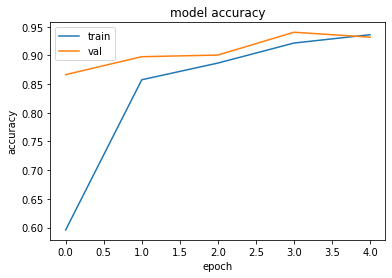

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

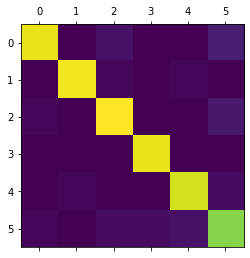

In [ ]:
def get_confusion_matrix(model, validation_generator):
    all_predictions = np.array([])
    all_labels = np.array([])
    for i in range(len(validation_generator)):
        x_batch, y_batch = validation_generator[i]
        predictions = model.predict(x_batch)
        predictions = np.argmax(predictions, axis = 1)
        all_predictions = np.concatenate([all_predictions, predictions])
        labels = np.argmax(y_batch, axis = 1)
        all_labels = np.concatenate([all_labels, labels])

    return tf.math.confusion_matrix(all_predictions, all_labels)
plt.matshow(get_confusion_matrix(model,validation_generator=valid_generator))